## Experiments on Maze 5x5

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from baselines.common import plot_util as pu
import os
import pandas as pd
import pickle as pkl
plt.style.use("seaborn")
% matplotlib inline

In [2]:
def plot_her(path):
    r = pd.read_csv(path + "/progress.csv")
    interval = 1
    plt.figure(dpi=80, figsize=[14, 8])
    plt.subplot(3, 2, 1)
    plt.plot(r.total_timesteps[::interval], r.succ_ratio[::interval])
    plt.title("succ_ratio")
    plt.subplot(3, 2, 2)
    plt.plot(r.total_timesteps[::interval], r.final_x_pos[::interval])
    plt.title("final_x_pos")
    plt.subplot(3, 2, 3)
    plt.plot(r.total_timesteps[::interval], r.her_entropy[::interval])
    plt.title("entropy")
    plt.subplot(3, 2, 4)
    plt.plot(r.total_timesteps[::interval], r.episode_length[::interval])
    plt.title("episode_length")
    plt.subplot(3, 2, 5)
    plt.plot(r.total_timesteps[::interval], r.int_rewards[::interval])
    plt.title("int_rewards")
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    return r

Text(0.5,1,'Maze 5x5')

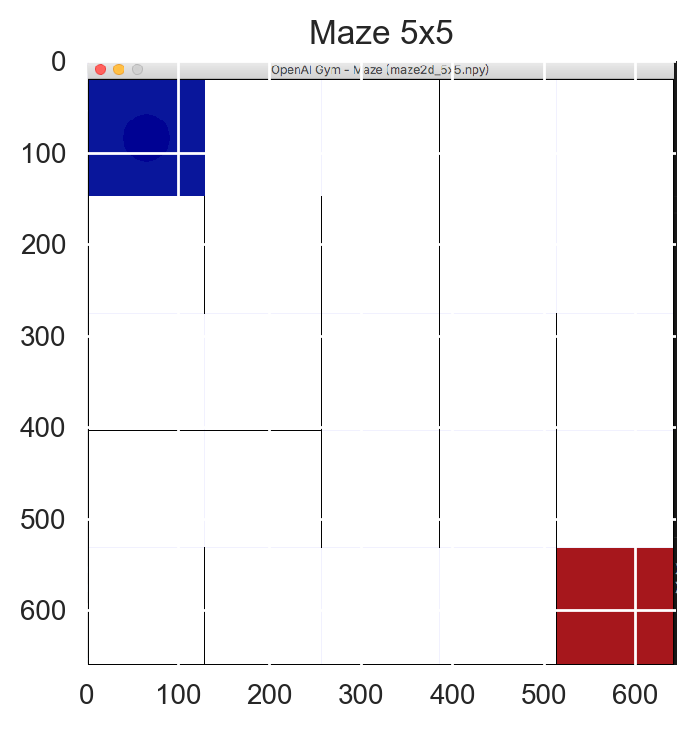

In [3]:
img = mpimg.imread("/Users/liziniu/Desktop/maze.png")
plt.figure(dpi=200)
plt.imshow(img)
plt.title("Maze 5x5")

In [4]:
print("Each step is given -0.1/maze_size unless it reaches the red block and get +1")

Each step is given -0.1/maze_size unless it reaches the red block and get +1


## Valllina Algorithm without Goal

In [5]:
def plot_maze(path):
    monitor = pd.read_csv(path + "/" + "0.0.monitor.csv",skiprows=1)
    plt.figure(dpi=70, figsize=[10, 8])
    plt.subplot(2, 2, 1)
    plt.plot(np.cumsum(monitor.l), np.clip(pu.smooth(monitor.r, radius=5), -0.2, 1))
    plt.title("return")
    plt.ylim([-0.3, 1.2])
        
    progress = pd.read_csv(path + "/" + "progress.csv")
    plt.subplot(2, 2, 2)
    if "acer" in path:
        plt.plot(progress.total_timesteps, progress.entropy)
    elif "ppo" in path:
        plt.plot(progress.total_timesteps, progress.policy_entropy)
    elif "her2" in path or "her" in path:
        plt.plot(progress.total_timesteps, progress.her_entropy)
    plt.title("entropy")
    
    plt.subplot(2, 2, 3)
    if "acer" in path:
        plt.plot(progress.total_timesteps, progress.explained_variance)
    elif "ppo" in path:
        plt.plot(progress.total_timesteps, progress.explained_variance)
    elif "her2" in path or "her" in path:
        plt.plot(progress.total_timesteps, progress.her_explained_variance)
    plt.title("explained_variance")
    plt.ylim([-2, 1.5])
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

### ppo

#### 1e5 steps

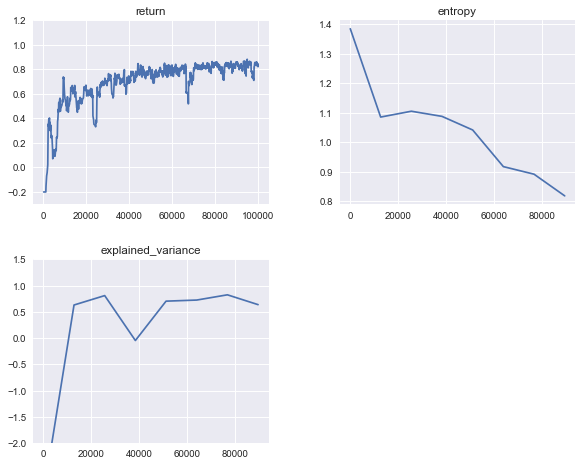

In [6]:
path = "/Users/liziniu/maze/logs/ppo/2019-05-10-14-58-10-466083"
plot_maze(path)

### acer

#### 1e5 steps

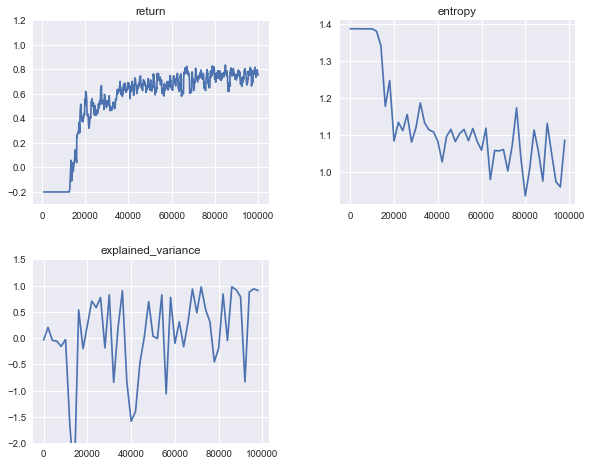

In [7]:
path = "/Users/liziniu/maze/logs/acer2/2019-05-10-15-00-16-615320"
plot_maze(path)

#### 2e5 steps

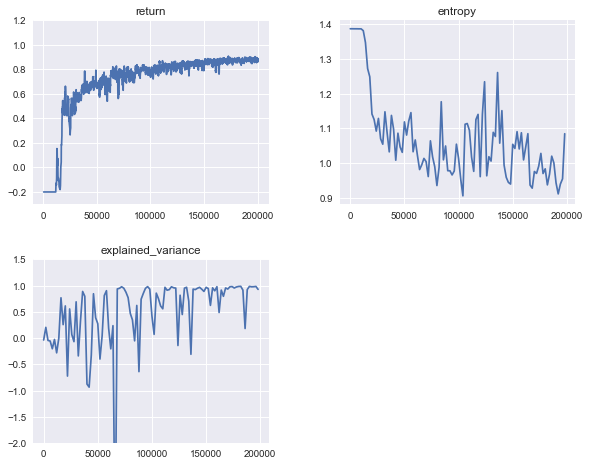

In [8]:
path = "/Users/liziniu/maze/logs/acer2/2019-05-10-15-28-59-377709"
plot_maze(path)

## Revised Acer with Goal

###  No her

#### 1e5 steps, buffer=1

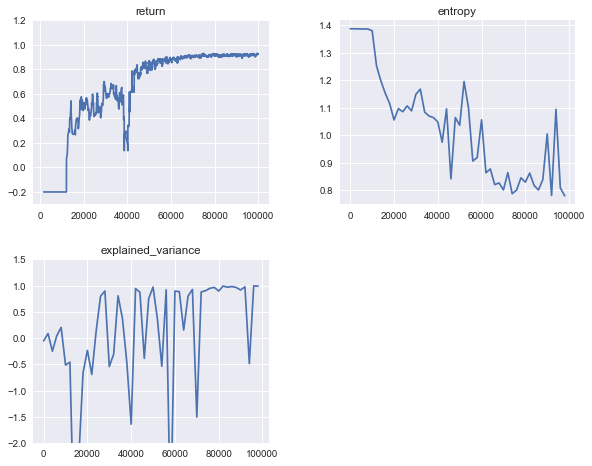

In [9]:
# this results shold be exactly same with 4.1.1
path = "/Users/liziniu/maze/logs/her2/no_her/2019-05-10-20-42-30-627736"
plot_maze(path)

### With Her

#### 1e5 steps buffer=1

This her revise next_goal to hold that next_goal=current_goal when feed into network.
Thus the explained variance is approximate to 1.


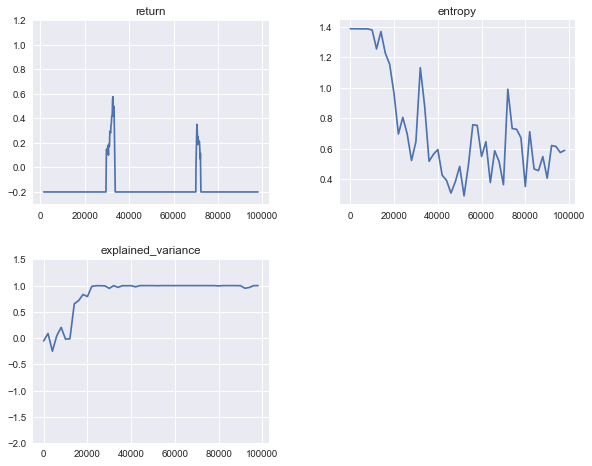

In [10]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-10-21-08-06-155667"
plot_maze(path)
print("This her revise next_goal to hold that next_goal=current_goal when feed into network.")
print("Thus the explained variance is approximate to 1.")

#### 1e5 steps buffer=2

This her revise next_goal to hold that next_goal=current_goal when feed into network.
Thus the explained variance is approximate to 1.


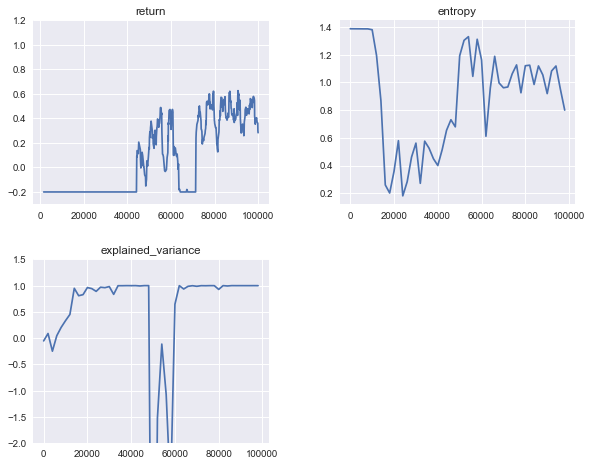

In [11]:
path = "/Users/liziniu/maze/logs/her2/her/2019-05-10-21-26-07-671793"
plot_maze(path)
print("This her revise next_goal to hold that next_goal=current_goal when feed into network.")
print("Thus the explained variance is approximate to 1.")

## Vallina Acer with Goal

### No her 

#### 1e5 steps, buffer=1

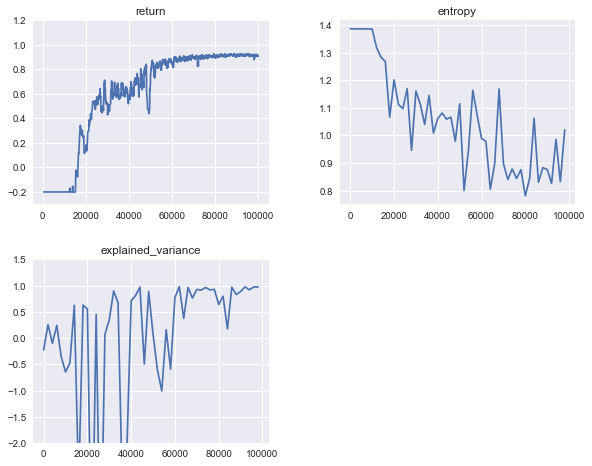

In [12]:
path = "/Users/liziniu/maze/logs/her/no_her/2019-05-10-18-05-46-397613"
plot_maze(path)

#### 1e5 steps, buffer=2

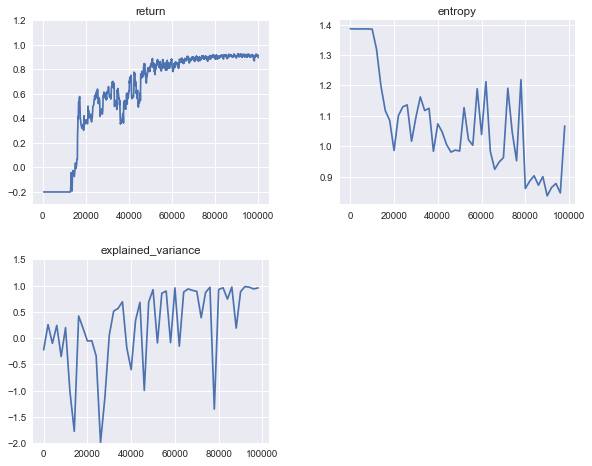

In [13]:
path = "/Users/liziniu/maze/logs/her/no_her/2019-05-10-20-46-52-570922"
plot_maze(path)

### With Her

#### 1e5 steps, buffer=1

Note: vallina acer do not hold the assumption that next_goal=current_goal.
Thus explained_variance is worse than 1.
As a contrast, pleases see Section3.2 .


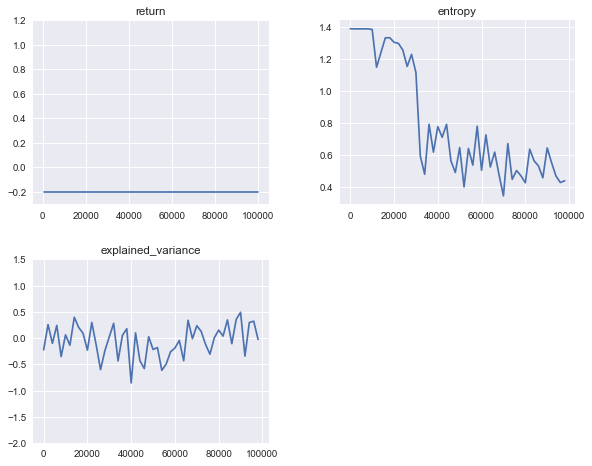

In [14]:
path = "/Users/liziniu/maze/logs/her/her/2019-05-10-21-02-20-440719"
plot_maze(path)
print("Note: vallina acer do not hold the assumption that next_goal=current_goal.")
print("Thus explained_variance is worse than 1.")
print("As a contrast, pleases see Section3.2 .")

#### 1e5 steps, buffer=2

Note: vallina acer do not hold the assumption that next_goal=current_goal
Thus explained_variance is worse than 1.
As a contrast, pleases see Section3.2 .


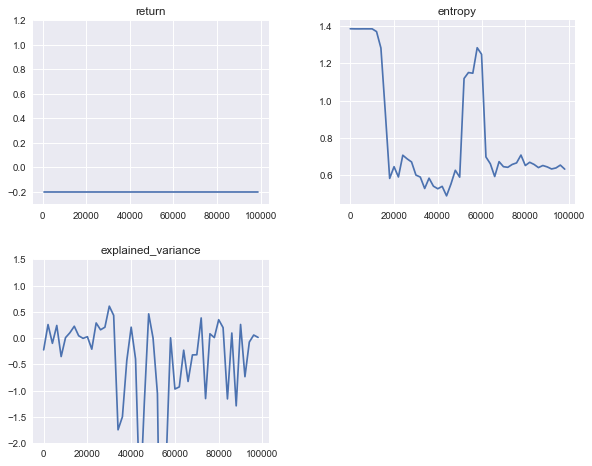

In [15]:
path = "/Users/liziniu/maze/logs/her/her/2019-05-10-21-30-18-913068"
plot_maze(path)
print("Note: vallina acer do not hold the assumption that next_goal=current_goal")
print("Thus explained_variance is worse than 1.")
print("As a contrast, pleases see Section3.2 .")